In [8]:
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Preliminary

Load datasets

In [10]:
data01 = np.load("data/data01.npy")
X01, Y01 = data01[:,0], data01[:,1]
data02 = np.load("data/data02.npy")
X02, Y02 = data02[:,0], data02[:,1]
data03 = np.load("data/data03.npy")
X03, Y03 = data03[:,0], data03[:,1]
data04 = np.load("data/data04.npy")
X04, Y04 = data04[:,0], data04[:,1]

def sort_wrt_x_axis(X,Y, return_idx=False):
    """
    Sort X and Y with respect to X, usefull for better plots
    """
    idx = np.argsort(X)
    if return_idx:
        res = (X[idx], Y[idx], idx)
    else:
        res = (X[idx], Y[idx])
    return res

### Linear regression

#### Idea

Given a point cloud defined by $n$ pairs $(x_i,y_i)$ where $x_i$ are features (or predictors) and $y$ are observed values.
The objective of linear regression is to find the straight line that fits the best to this point cloud, i.e find the line's parameters $W$ (for *weights*) such that $\textrm{SSE} = \sum_i \epsilon_i^2$ is minimal in 

$$\mathbf{y} = \mathbf{X} \mathbf{w} + \mathbf{\epsilon}$$

It turns out that this error is minimal for $$\hat{\mathbf{w}} = X^+\mathbf{y}$$ where $X^+$ is the pseudo-inverse of $X$, i.e  $X^+ = (X'X)^{-1}X'$

Once your parameter $\hat{w}$ computed you can use your model on new feature values $X_{new}$ to predict $\mathbf{y}_{pred}$ with $$\mathbf{y}_{pred} = X_{new} \hat{\mathbf{w}}$$

#### Notations for **multivariate**, **simple** linear regression

- $n$ input vectors $\mathbf{x}_{i=1..n}$ in a $p+1$ dimensional space representing $n$ samples of $p$ features (+ 1 dummy variable for the biais) , i.e 

\begin{equation}
\mathbf{x}_i = \begin{bmatrix}1, x_{i,1}, x_{i,2}, \cdots, x_{i,p}\end{bmatrix}^T \in R^{p}  \qquad \textrm{and}  \;
\mathbf{X} = 
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots & \vdots  & \vdots  & \ddots & \vdots  \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,p}
\end{bmatrix} \in R^{(n, p+1)}
\end{equation}

- $n$ output values $\mathbf{y}_{i=1..n}$ (one for each input) representing $n$ observations in a $R$

\begin{equation}
\mathbf{y} = 
\begin{bmatrix}y_{1}, y_{2}, \cdots,y_{n}
\end{bmatrix}^T \in R^{n}
\end{equation}

- $p+1$ unknown parameters or regression coefficients $w_{k=0..p}$ (one for each feature + biais) representing the slope associated to the $k$th feature

\begin{equation}
\mathbf{w} = 
\begin{bmatrix}w_{0}, w_{0}, \cdots & w_{p} \end{bmatrix}^T\in R^{p+1}
\end{equation}

In [11]:
def add_dummy_variable(x):
    return np.c_[np.ones(len(x)), x]

def fit_LR(x,y, add_biais=True):
    """
    Solve the linear regression problem, i.e compute W_hat
    """
    X = np.copy(x)
    # Add dummy variable if not already done
    if add_biais:
        X = add_dummy_variable(X)
    # Returns W = pseudo_inv(X) * y
    return np.matmul(np.linalg.pinv(X),y)

def predict_LR(x, W, add_biais=True):
    """
    Returns ``Y_pred`` given new features values and a weights
    """
    X = np.copy(x)
    # Add dummy variable if not already done
    if add_biais:
        X = add_dummy_variable(X)
    # Returns y_pred = X * W
    return np.matmul(X,W)

#### Illustration: Univariate simple linear regression

- If $p$ = 1 (i.e one feature), the regression is simple.
- If $q$ = 1 (i.e predicted value in $R$), the regression is univariate

Questions:

1. Datasets 
  1. Using the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn library, split ``X01`` and ``Y01`` into 3 datasets, a training one, a validation one and a testing one with a ratio 0.6, 0.2, 0.2.
  2. Print the length (number of datapoints) of each datasets using [len()](https://docs.python.org/3/library/functions.html#len) or [ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)
2. Fitting your model
  1. Call ``fit_LR`` on your training dataset to compute the weights (store them in ``W``)
  2. What do ``W[0]`` and ``W[1]`` represent?
3. Predictions
  1. Call  ``predict_LR`` on your validation dataset and store the output in ``Y01_pred``
4. Same thing using scikit-learn: ``regr`` is an object of the class [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression) from the scikit-learn library
  1. Apply the [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method to ``regr``  using your training dataset.
  2. Apply the [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method to``regr`` using your validation dataset.
  3. Take a look at how the mse (Mean Square Error) of ``Y01_pred`` is computed and then compute the mse of ``Y01_pred_scikit``
  4. Take a look at how how the coefficient of determination $R^2$ is computed and then compute $R^2$ of ``Y01_pred_scikit`` ([Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination): "*$R^2$ is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).  It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model"*)
  5. Compare with the Mean Square Error and the coefficient of determination of ``Y01_pred``. 

 ============ Split datasets ============
Datapoints used for training:    240
Datapoints used for validation:  80
Datapoints used for testing :    80
 ============ Using Formula ============
 --- Fit the linear model ---
W_0 : 3.73
W_1 : 2.03
Mean Square Error: 95.20
Coefficient of determination: 0.85


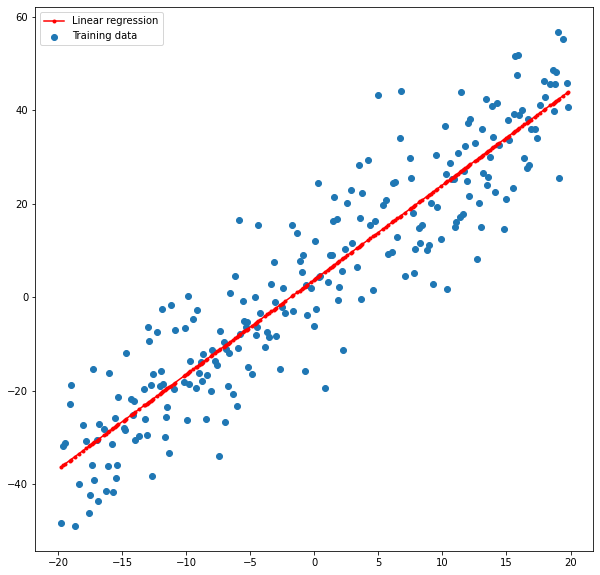

 --- Predictions ---
Mean Square Error: 93.13
Coefficient of determination: 0.86


In [38]:
print(" ============ Split datasets ============")

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets
X01_train, X01_val_test, Y01_train, Y01_val_test = train_test_split(X01, Y01, 
                                       test_size= 0.4,
                                       shuffle=True, 
                                       random_state=seed)

seed = 221
# Shuffle and split the data into validation and test sets
X01_val ,X01_test, Y01_val, Y01_test = train_test_split(X01_val_test, Y01_val_test, 
                                       test_size=0.5,
                                       shuffle=True, 
                                       random_state=seed)                                                                   

# sort with respect to x_axis for better plots
X01_train, Y01_train = sort_wrt_x_axis(X01_train, Y01_train)
X01_val, Y01_val = sort_wrt_x_axis(X01_val, Y01_val)
X01_test, Y01_test = sort_wrt_x_axis(X01_test, Y01_test)


# Store number of datapoints in each dataset:
N_train = len(Y01_train)
N_val = len(Y01_val)
N_test = len(Y01_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for validation: ", N_val)
print("Datapoints used for testing :   ", N_test)

print(" ============ Using Formula ============")
print(" --- Fit the linear model ---")
# ----------------------
# Training
# ----------------------
W = fit_LR(X01_train, Y01_train,
             add_biais=True)
print("W_0 : %.2f" %W[0])
print("W_1 : %.2f" %W[1])
# Evaluating performance on training data
Y01_pred = predict_LR(X01_train, W, add_biais=True)
print("Mean Square Error: %.2f" %mean_squared_error(Y01_train, Y01_pred))
print('Coefficient of determination: %.2f' %r2_score(Y01_train, Y01_pred))

# ----------------------
# Plots
# ----------------------
fig = plt.figure(figsize=(10,10))
plt.scatter(X01_train,Y01_train, label="Training data")
plt.plot(X01_train,Y01_pred, c="r", marker=".", label="Linear regression")
plt.legend()
plt.show()

print(" --- Predictions ---")
# ----------------------
# Evaluation
# ----------------------
Y01_pred = predict_LR(X01_val, W, add_biais=True)
# Performance on validation data
print("Mean Square Error: %.2f" %mean_squared_error(Y01_val, Y01_pred))
print('Coefficient of determination: %.2f' %r2_score(Y01_val, Y01_pred))

 ============ Using scikit-learn ============ 
 --- Fit the linear model ---
W_0 : 3.73
W_1 : 2.03
 --- Predictions ---
Mean Square Error: 93.13
Coefficient of determination: 0.86


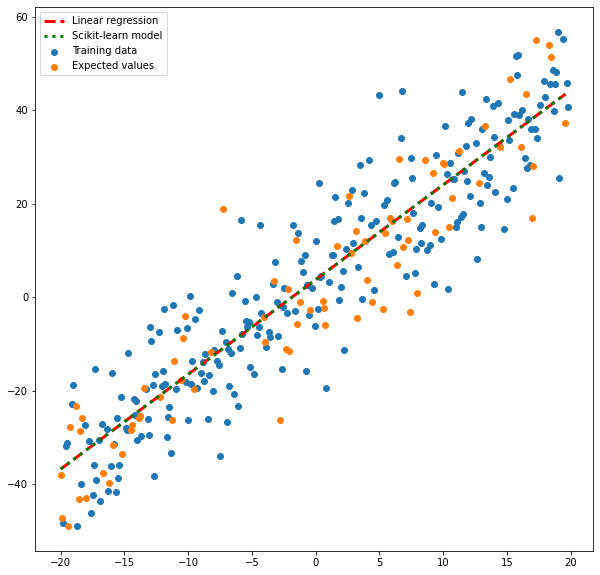

In [37]:
print(" ============ Using scikit-learn ============ ")
regr = LinearRegression()
print(" --- Fit the linear model ---")
# ----------------------
# Training
# ----------------------
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature

regr.fit(X01_train.reshape(-1, 1), Y01_train.reshape(-1, 1)) #TODO!
print("W_0 : %.2f" %regr.intercept_[0])
print("W_1 : %.2f" %regr.coef_[0,0])

print(" --- Predictions ---")
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature
Y01_pred_scikit = regr.predict(X01_val.reshape(-1, 1))              #TODO!
print("Mean Square Error: %.2f" %mean_squared_error(Y01_val, Y01_pred_scikit))
print('Coefficient of determination: %.2f' %r2_score(Y01_val, Y01_pred_scikit))

# ----------------------
# Plots
# ----------------------
fig = plt.figure(figsize=(10,10))
plt.scatter(X01_train,Y01_train, label="Training data")
plt.scatter(X01_val,Y01_val, label="Expected values")
plt.plot(X01_val,Y01_pred, c="r", ls="--",lw=3, label="Linear regression")
plt.plot(X01_val, Y01_pred_scikit, c="g", ls=":", lw=3, label="Scikit-learn model")
plt.legend()
plt.show()

#### Simple linear regression on non-linear data

1. Datasets 
  1. Using the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn library, split ``X02`` and ``Y02`` into 3 datasets, a training one, a validation one and a testing one with a ratio 0.6, 0.2, 0.2.
2. Fitting your model
  1. Call ``fit_LR`` on your training dataset to compute the weights (store them in ``W``)
3. Predictions
  1. Call  ``predict_LR`` on your validation dataset and store the output in ``Y02_pred``
  2. Compute the Mean Squared Error (MSE) of ``Y02_pred``
  3. Computed the coefficient of determination $R^2$ of ``Y02_pred``
4. Interpretation
  1. Do you think that the linear regression works well here? Why?
  2. If you had to compare the performance of this linear regression with the performance of the linear regression in the cell above, would you rather look at the mean squared error or the coefficient of determination? Why?
  3. Would a bigger training dataset improve the perfomance? Why?

In [ ]:
print(" ============ Split datasets ============")

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets
X02_train, X02_val_test, Y02_train, Y02_val_test = ... #TODO!
seed = 221
# Shuffle and split the data into validation and test sets
X02_val, X02_test, Y02_val, Y02_test = ...             #TODO!

# sort with respect to x_axis for better plots
X02_train, Y02_train = sort_wrt_x_axis(X02_train, Y02_train)
X02_val, Y02_val = sort_wrt_x_axis(X02_val, Y02_val)
X02_test, Y02_test = sort_wrt_x_axis(X02_test, Y02_test)
print("Datapoints used for training:   ", len(Y02_train))
print("Datapoints used for validation: ", len(Y02_val))
print("Datapoints used for testing :   ", len(Y02_test))

print(" ============ Linear regression ============")
# ----------------------
# Training
# ----------------------
... = fit_LR(..., ...)             #TODO!
print("W_0 : %.2f" %W[0])
print("W_1 : %.2f" %W[1])
# ----------------------
# Evaluation
# ----------------------
... = predict_LR(...)                            #TODO!
print("Mean Square Error: %.2f" %...)            #TODO!
print('Coefficient of determination: %.2f' %...) #TODO!
# ----------------------
# Plots
# ----------------------
plt.figure(figsize=(10,10))
plt.scatter(X02_train,Y02_train, label="Training data")
plt.scatter(X02_val,Y02_val, label="Expected values")
plt.plot(X02_val,Y02_pred, c="r", marker=".", label="Linear regression")
plt.legend()
plt.show()

### Linear regression with polynomial basis functions

From now on we will apply a non-linear transformation to ``X``, store the transformed data in a matrix ``phi`` and then  perform linear regression. 
This is called a linear basis functions model. 

In the lecture (slide 18), there is an example with a polynomial basis function $phi(x) = (1, x, x^2)$

Questions:

1. Function ``phi_polynomial``:
  1. complete this function taking the data ``X`` and a max degree ``d`` and returns ``phi`` containing the following matrix 
\begin{equation}
\Phi = 
\begin{bmatrix}
1 & x_{1} & x_{1}^2 & \cdots & x_{1}^d \\
1 & x_{2} & x_{2}^2 & \cdots & x_{2}^d \\
\vdots & \vdots  & \vdots  & \ddots & \vdots  \\
1 & x_{n} & x_{n}^2 & \cdots & x_{n}^d
\end{bmatrix} \in R^{(n, d+1)}
\end{equation}
2. For all ``d`` in ``d_list``:
  1. Training:
    1. Compute ``phi_train`` by calling  ``phi_polynomial`` on your training data
    2. Compute ``W`` by calling ``fit_LR`` on your transformed data and your training set of  expected values
  2. Evaluation:
    1. Transform your validation data and store them in ``phi_val``
    2. Compute your predictions ``Y02_pred`` given your transformed validation data and your weights
    3. Look at how the mse and the coefficient of determination $R^2$ were computed with the training data. Do the same with your validation data and store the mse and $R^2$ in ``mse_val`` and ``r2_val``
3. Interpretation:
  1. What do you obtain for ``d=0``?
  2. What do you obtain for ``d=1``? Compare with the cell above.
  3. By looking at the mse and coefficient of determination, which degree would you choose for your model?
  4. Models with a degree between 5 and 20 seem to work similarly. In the situation when several models of different complexity have approximately the same performance,  what is usually the preferred option?
  5. For which values of ``d`` does the model seem to overfit?
  6. For ``d>16`` the performance on training data is getting worse. According to you, what could cause that?

In [ ]:
# ----------------------
# Polynomial basis functions
# ----------------------
def phi_polynomial(X,d):
    """
    Compute polynomial basis functions
    
    The biais is included in this function
    """
    # TODO!
    return phi

print(" ============ Linear regression with polynomial basis functions ============")
mse_train = []
mse_val = []
r2_train = []
r2_val= []
d_list = list(range(6))+list(range(6,35,5))
for d in d_list:
    # ----------------------
    # Training
    # ----------------------
    phi_train = phi_polynomial(...)  # TODO!
    W = fit_LR(..., ...,
               add_biais=False)  #The biais is already included in phi
    # ----------------------
    # Evaluation
    # ----------------------
    # Evaluate performance on training data
    Y02_pred_train = predict_LR(phi_train,W, add_biais=False) #The biais is already included in phi
    mse_train.append(mean_squared_error(Y02_train, Y02_pred_train))
    r2_train.append(r2_score(Y02_train, Y02_pred_train))
    
    # Evaluate performance on validation data
    phi_val = phi_polynomial(...) # TODO!
    Y02_pred = predict_LR(... , ...,       # TODO!
                          add_biais=False) #The biais is already included in phi
    mse_val.append(...)    # TODO!
    r2_val.append(...)     # TODO!
    # ----------------------
    # Plots
    # ----------------------
    plt.figure(figsize=(10,10))
    plt.scatter(X02_train,Y02_train, label="Training data")
    plt.scatter(X02_val,Y02_val, label="Expected values")
    plt.plot(X02_val,Y02_pred, c="r", marker=".", label="degree d="+str(d))
    plt.legend()
    plt.show()

# ----------------------
# Overview
# ----------------------
def plot_mse_r2(x_axis, mse_train, mse_val, r2_train, r2_val):
    """
    Plot training and validation Mean Squared Error and r2  
    """
    plt.figure(figsize=(10,10))
    plt.ylim(min(min(mse_train),min(mse_val)), min(max(max(mse_train), max(mse_val)), 300))
    plt.plot(x_axis, mse_train, label="Training")
    plt.plot(x_axis, mse_val, label="Validation")
    plt.legend()

    
    plt.figure(figsize=(10,10))
    plt.ylim(0,1)
    plt.plot(x_axis, r2_train, label="Training")
    plt.plot(x_axis, r2_val, label="Validation")
    plt.legend()
    
plot_mse_r2(d_list, mse_train, mse_val, r2_train, r2_val)

### Linear regression with polynomial basis functions on non-polynomial data

1. Datasets 
  1. Using the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn library, split ``X03`` and ``Y03`` into 3 datasets, a training one, a validation one and a testing one with a ratio 0.6, 0.2, 0.2.
2. Polynomial basis functions using scikit-learn:
 1. Apply the [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method to ``poly_model``  using your training dataset.
  2. Apply the [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method to ``poly_model`` using your validation dataset.
  3. Compute the coefficient of determination $R^2$ of your predictions on your validation data and store the successive values in ``mse_val`` and ``r2_val``
3. Interpretation:
  1. Does the model work well?
  2. Do you think polynomial functions are adapted for this problem?
  3. For ``d>20`` the performance on training data is getting worse. According to you, what could cause that?

In [ ]:
print(" ============ Split datasets ============")

seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets
... # TODO!
seed = 221
# Shuffle and split the data into validation and test sets
... # TODO!

# sort with respect to x_axis for better plots
X03_train, Y03_train = sort_wrt_x_axis(X03_train, Y03_train)
X03_val, Y03_val = sort_wrt_x_axis(X03_val, Y03_val)
X03_test, Y03_test = sort_wrt_x_axis(X03_test, Y03_test)
print("Datapoints used for training:   ", len(Y03_train))
print("Datapoints used for validation: ", len(Y03_val))
print("Datapoints used for testing :   ", len(Y03_test))

print(" ============ Using scikit learn ============")
mse_train = []
mse_val = []
r2_train = []
r2_val= []
d_list = list(range(2,10))+list(range(10,30,5))
for d in d_list:
    poly_model = make_pipeline(PolynomialFeatures(d),
                               LinearRegression())
    # ----------------------
    # Training
    # ----------------------
    # Use array.reshape(-1, 1) if your data has a single feature
    poly_model.fit(..., ...) # TODO!
    # ----------------------
    # Evaluation
    # ----------------------
    # Evaluate performance on training data
    # Use array.reshape(-1, 1) if your data has a single feature
    y_pred_train = poly_model.predict(X03_train.reshape(-1, 1))
    mse_train.append(mean_squared_error(Y03_train, y_pred_train))
    r2_train.append(r2_score(Y03_train, y_pred_train))
    
    # Evaluate performance on validation data
    y_pred_scikit = poly_model.predict(...)  # TODO!
    mse_val.append(...)                      # TODO!
    r2_val.append(...)                       # TODO!
    # ----------------------
    # Plots
    # ----------------------
    plt.figure(figsize=(10,10))
    plt.scatter(X03_train,Y03_train, label="Training data")
    plt.scatter(X03_val,Y03_val, label="Expected values")
    plt.plot(X03_val,y_pred_scikit, c="r", marker=".", label="Scikit-learn, degree d="+str(d))
    plt.legend()
    plt.show()
    
# ----------------------
# Overview
# ----------------------
plot_mse_r2(d_list, mse_train, mse_val, r2_train, r2_val)

### Cosine regression

Since the polynomial basis functions did not seem to work well on these data, we will use another type of basis function: cosine functions. To do so we need to implement a new function ``phi_cosine`` that will transform our data ``X`` using cosine functions.
Questions:

1. Function ``phi_cosine``:
  1. Using [np.cos()](https://numpy.org/doc/stable/reference/generated/numpy.cos.html#numpy-cos), complete this function taking the data ``X`` and a number of cosine ``n_cosine`` and returns ``phi`` containing the following matrix 
\begin{equation}
\Phi = 
\begin{bmatrix}
1 & cos(x_{1}) & cos(2   x_{1}) & \cdots & cos(n_{cosine}   x_{1}) \\
1 & cos(x_{2}) & cos(2   x_{2}) & \cdots & cos(n_{cosine}   x_{2}) \\
\vdots & \vdots  & \vdots  & \ddots & \vdots  \\
1 & cos(x_{n}) & cos(2   x_{n}) & \cdots & cos(n_{cosine}   x_{n})
\end{bmatrix} \in R^{(n, n_{cosine}+1)}
\end{equation}
2. Training
  1. Transform and fit your model using ``phi_cosine`` and ``fit_LR`` (Hint: look at what  you did with with polynomial functions)
3. Evaluation
  1. Use ``predict_LR`` on your training and validation datasets. 
  2. Compute and store your mean square errors and coefficient of determination in ``mse_train, mse_val, r2_train, r2_val``
4. Interpretation
  1. Does a cosine transformation seem to work better than a polynomial transformation on this data? 


In [ ]:
def phi_cosine(X,n_cosine):
    # TODO!
    return phi

mse_train = []
mse_val = []
r2_train = []
r2_val= []
n_list = list(range(1,10))
for n in n_list:
    # ----------------------
    # Training
    # ----------------------
    phi_train = phi_cosine(...)   # TODO!
    W = fit_LR(..., ..., ...)     # TODO!
    # ----------------------
    # Evaluation
    # ----------------------
    # Evaluate performance on training data
    Y03_pred_train = predict_LR(..., ..., ...)  # TODO!
    mse_train.append(...)                       # TODO!
    r2_train.append(...)                        # TODO!
    
    # Evaluate performance on validation data
    phi_val = phi_cosine(...)                   # TODO!
    Y03_pred = predict_LR(..., ..., ...)        # TODO!
    mse_val.append(...)                         # TODO!
    r2_val.append(...)                          # TODO!
    # ----------------------
    # Plots
    # ----------------------
    plt.figure(figsize=(10,10))
    plt.scatter(X03_train,Y03_train, label="Training data")
    plt.scatter(X03_val,Y03_val, label="Expected values")
    plt.plot(X03_val,Y03_pred, c="r", marker=".", label=n)
    plt.legend()
    plt.show()
    
# ----------------------
# Overview
# ----------------------
plot_mse_r2(n_list, mse_train, mse_val, r2_train, r2_val)

### Gaussian regression


In the lecture (slide 19), there is an example with a gaussian basis function $$\Phi(x) = (e^{\epsilon(||\mathbf{x}-\mathbf{c}||)})$$

Where $\mathbf{c}$ is the center points

In the cell below we implemented ``phi_gaussian`` that works exactly as ``phi_polynomial`` and ``phi_cosine`` work.

Questions:

There are no questions for this one :) 

In [ ]:
def phi_gaussian(X,n_gaussians, sigma=None):
    """
    Gaussian basis functions, uniformly spaced
    
    The biais is included in this function
    """
    phi = np.ones((len(X),n_gaussians+1))
    centers = np.linspace(X.min(), X.max(), n_gaussians)
    if sigma is None:
        if n_gaussians < 2:
            sigma = (X.max()-X.min())/2
        else:
            sigma = (centers[1]-centers[0])/2
    for i in range(1,n_gaussians+1):
        phi[:,i] = np.exp(-(X-centers[i-1])**2/sigma)
    return phi

### Choose the right basis functions and the right parameters

In this notebook you could observe that the performance a given transformation (basis function) depends a lot on your problem (i.e your data) 

Then once the transformation is choosen, the complexity of your model (how many basis functions you have) influences the performance too. 

In this cell you will use a new dataset: ``X04, Y04``. You will need to preprocess it as we did for the 3 other datasets and you will have to choose only one model (i.e one type of basis function and the number of basis functions).

You can choose among:

- simple linear regression (no transformation)
- polynomial basis functions
- cosine basis functions
- gaussian basis functions

We encourage you to try them all to make sure you find the best one :) 

Then tune your model parameters (which are ``d``, ``n_cosine``, ``n_gaussians`` here)